In [1]:
import os
import utils
import models
import tensorflow as tf
#from tensorflow.keras import losses, optimizers, callbacks

In [2]:
base=os.getcwd()
train_dir=os.path.join(base,"DIV2K_train_HR")
test_dir=os.path.join(base, "DIV2K_test_HR")
print("Base = {}".format(base))
print("Train = {}".format(train_dir))
print("Test = {}".format(test_dir))

Base = D:\DS294
Train = D:\DS294\DIV2K_train_HR
Test = D:\DS294\DIV2K_test_HR


In [3]:
crop_size = 500
sr_factor = 4
input_size = crop_size // sr_factor
batch_size = 24
val_split = 0.1
utils.showplot =1 #Set 1 to show plots in output
utils.res_fraction = 0.6 #Fraction of the original resolution at which the plots will be saved

In [4]:
ds_train, ds_valid = utils.define_datasets(train_dir, batch_size, crop_size, val_split)
ds_train, ds_valid = utils.map_datasets(ds_train, ds_valid)
test_paths = utils.generate_test_paths(test_dir)
ds_train, ds_valid = utils.transform_ds(ds_train, ds_valid, input_size, sr_factor)

Found 2400 files belonging to 1 classes.
Using 2160 files for training.
Found 2400 files belonging to 1 classes.
Using 240 files for validation.


Model: "ESPCN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 1)]   0         
_________________________________________________________________
conv2d (Conv2D)              (None, None, None, 64)    1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 64)    36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 64)    36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 64)    36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 32)    18464     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 32)    9248  

D:\DS294\utils.py:116: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


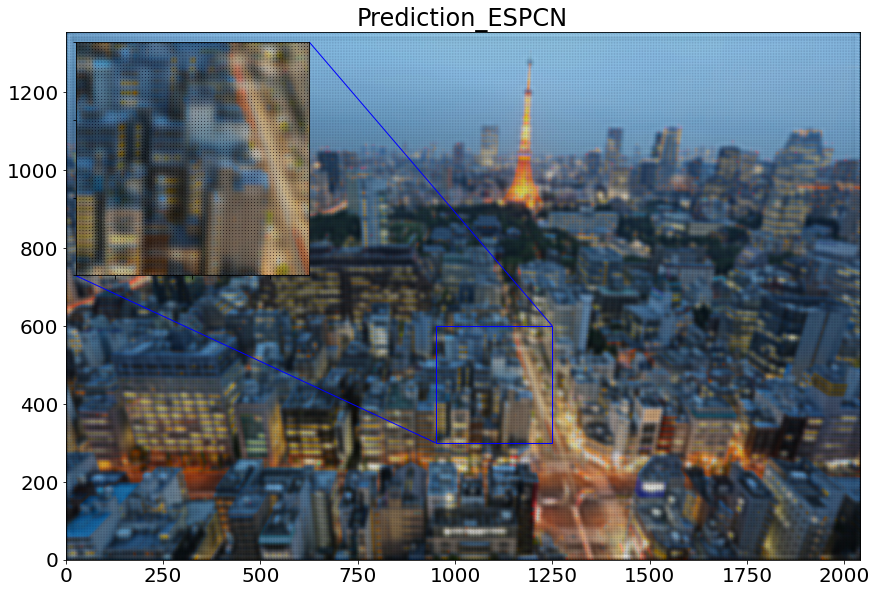

Epoch 2/101
90/90 [==============================] - 61s 638ms/step - loss: 0.0193 - val_loss: 0.0093
Average value of PSNR for current epoch: 20.18
Epoch 3/101
90/90 [==============================] - 62s 645ms/step - loss: 0.0096 - val_loss: 0.0078
Average value of PSNR for current epoch: 20.88
Epoch 4/101
90/90 [==============================] - 63s 650ms/step - loss: 0.0080 - val_loss: 0.0070
Average value of PSNR for current epoch: 21.69
Epoch 5/101
90/90 [==============================] - 63s 651ms/step - loss: 0.0072 - val_loss: 0.0068
Average value of PSNR for current epoch: 21.50
Epoch 6/101
90/90 [==============================] - 63s 652ms/step - loss: 0.0071 - val_loss: 0.0074
Average value of PSNR for current epoch: 21.44
Epoch 7/101
90/90 [==============================] - 63s 657ms/step - loss: 0.0069 - val_loss: 0.0065
Average value of PSNR for current epoch: 21.82
Epoch 8/101
90/90 [==============================] - 61s 629ms/step - loss: 0.0071 - val_loss: 0.0064
Aver

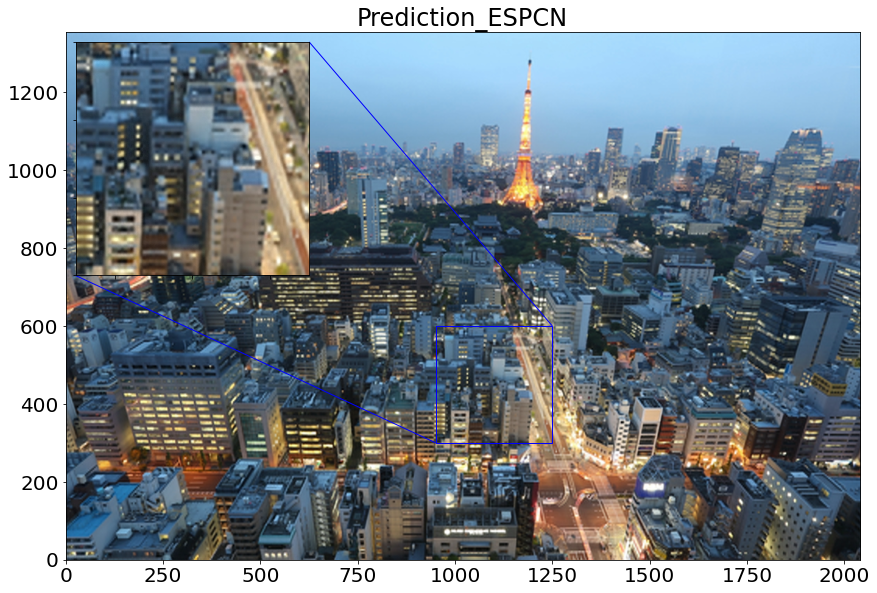

Epoch 52/101
90/90 [==============================] - 59s 611ms/step - loss: 0.0064 - val_loss: 0.0061
Average value of PSNR for current epoch: 22.48
Epoch 53/101
90/90 [==============================] - 59s 615ms/step - loss: 0.0062 - val_loss: 0.0061
Average value of PSNR for current epoch: 22.09
Epoch 54/101
90/90 [==============================] - 60s 628ms/step - loss: 0.0063 - val_loss: 0.0063
Average value of PSNR for current epoch: 21.89
Epoch 55/101
90/90 [==============================] - 59s 618ms/step - loss: 0.0062 - val_loss: 0.0063
Average value of PSNR for current epoch: 22.07
Epoch 56/101
90/90 [==============================] - 58s 607ms/step - loss: 0.0063 - val_loss: 0.0060
Average value of PSNR for current epoch: 22.15
Epoch 57/101
90/90 [==============================] - 58s 602ms/step - loss: 0.0062 - val_loss: 0.0061
Average value of PSNR for current epoch: 22.09
Epoch 58/101
90/90 [==============================] - 58s 602ms/step - loss: 0.0067 - val_loss: 0.00

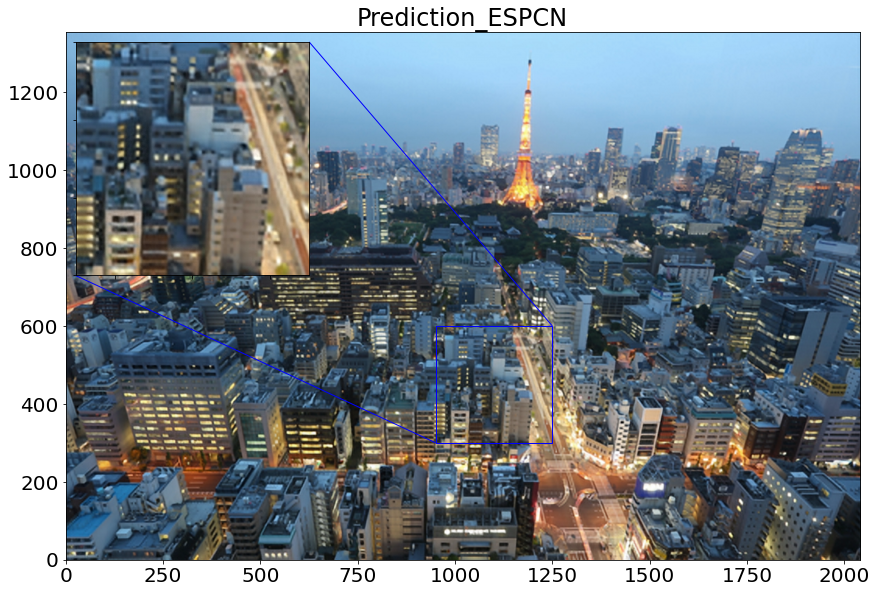

In [5]:
model_name ="ESPCN"
model = models.ESPCN(sr_factor=sr_factor, channels=1)
model.summary()
early_stop = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=40)
callbacks = [utils.SRCallback(test_paths, sr_factor, model_name), early_stop]
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

epochs = 101
model.compile(optimizer=optimizer, loss=loss_fn,)
r = model.fit(ds_train, epochs=epochs, callbacks=callbacks, validation_data=ds_valid, verbose=1)
model.save(model_name + '.h5')

PSNR of LR and HR image: 33.44548
SSIM of LR and HR image: 0.91359
PSNR of Predicted and HR image: 33.36631
SSIM of Predicted and HR image: 0.90278
D:\DS294


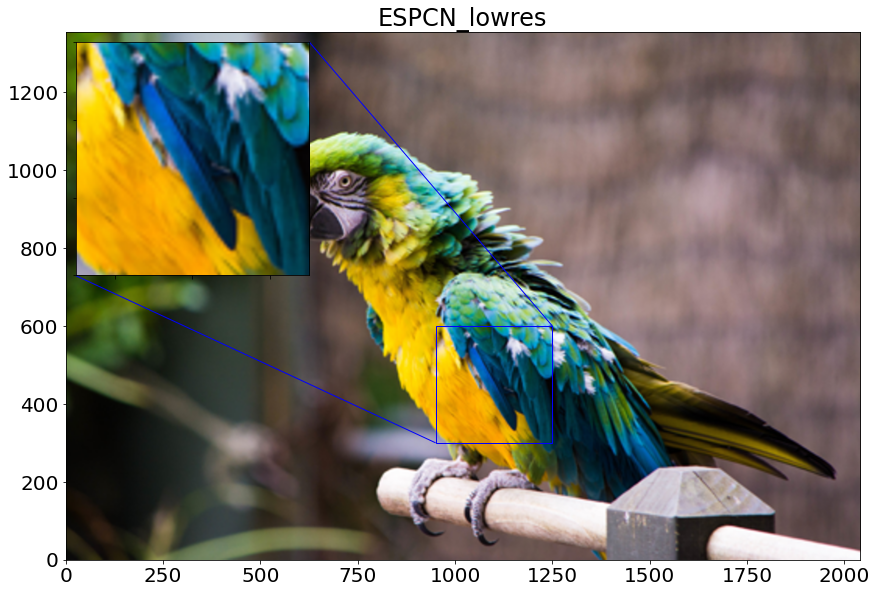

D:\DS294


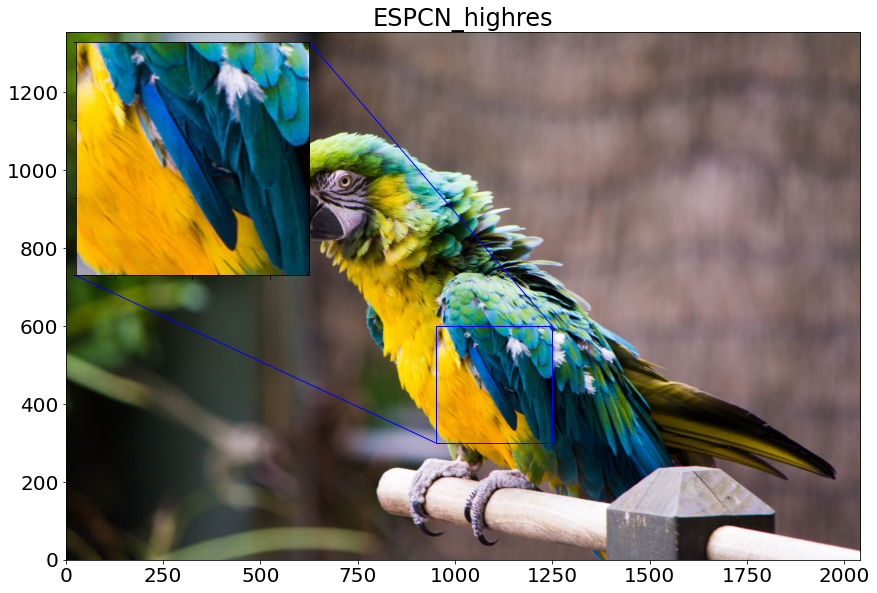

D:\DS294


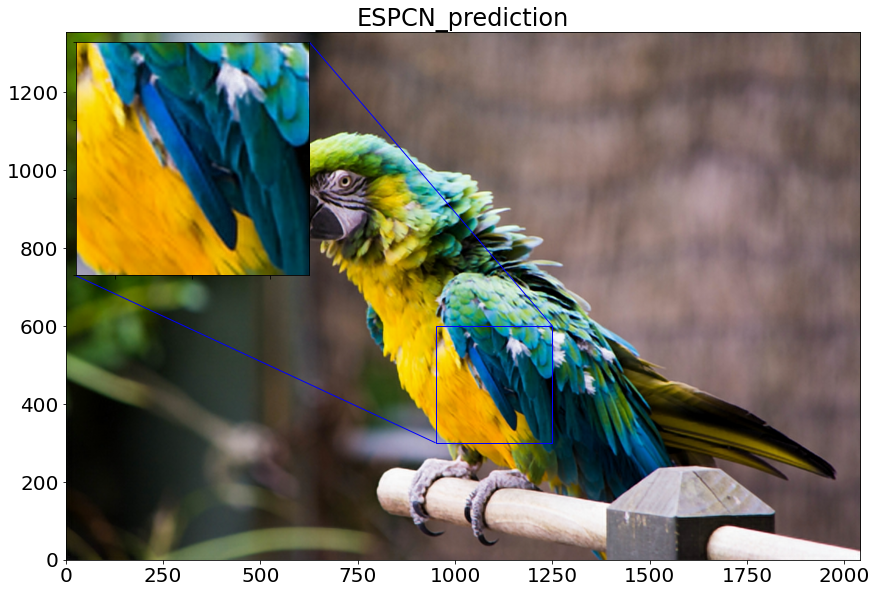

Avg. PSNR of LR and HR images is 26.6400
Avg. SSIM of LR and HR images is 0.7482
Avg. PSNR of Predictions and HR images is 27.0269
Avg. SSIM of Predictions and HR images is 0.7628
Avg. Inference Time is 0.3419 s


In [6]:
saved_model = tf.keras.models.load_model(model_name + '.h5')
utils.inference(saved_model, test_paths, sr_factor, model_name)

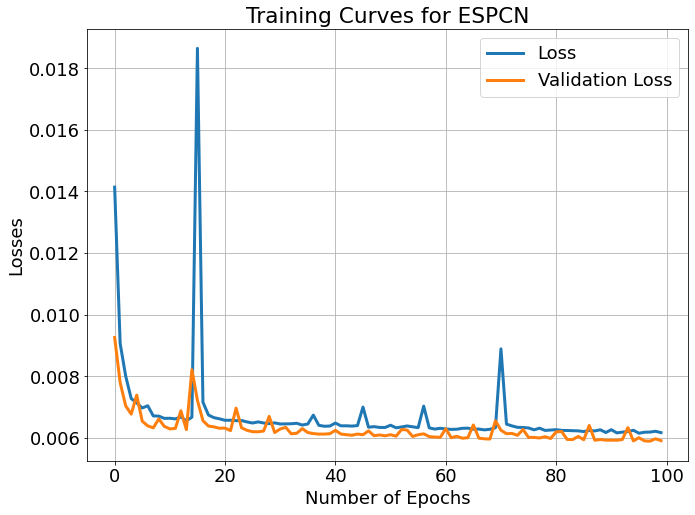

In [7]:
utils.training_stats(r, model_name)